In [5]:
import mne
import numpy as np
from matplotlib import pyplot as plt

In [2]:
filepath = '/mnt/nemar/openneuro/ds005515/sub-NDARXP930ZTG/eeg/sub-NDARXP930ZTG_task-RestingState_eeg.set'
raw = mne.io.read_raw_eeglab(filepath, preload=True)
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 129 EEG
 custom_ref_applied: False
 dig: 132 items (3 Cardinal, 129 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 129
 projs: []
 sfreq: 500.0 Hz
>

In [3]:
raw.info['chs'] # data is stored in microvolts

[{'loc': array([ 0.05787678,  0.05520863, -0.02577469,  0.        ,  0.        ,
          0.        ,         nan,         nan,         nan,         nan,
                 nan,         nan]),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'range': 1.0,
  'cal': 1e-06,
  'kind': 2 (FIFFV_EEG_CH),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'ch_name': 'E1',
  'scanno': 1,
  'logno': 1},
 {'loc': array([0.05291805, 0.06709098, 0.00307435, 0.        , 0.        ,
         0.        ,        nan,        nan,        nan,        nan,
                nan,        nan]),
  'unit_mul': 0 (FIFF_UNITM_NONE),
  'range': 1.0,
  'cal': 1e-06,
  'kind': 2 (FIFFV_EEG_CH),
  'coil_type': 1 (FIFFV_COIL_EEG),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 4 (FIFFV_COORD_HEAD),
  'ch_name': 'E2',
  'scanno': 2,
  'logno': 2},
 {'loc': array([0.03864122, 0.07634241, 0.0306777 , 0.        , 0.        ,
         0.        ,        nan,        nan,        nan,  

Using matplotlib as 2D backend.


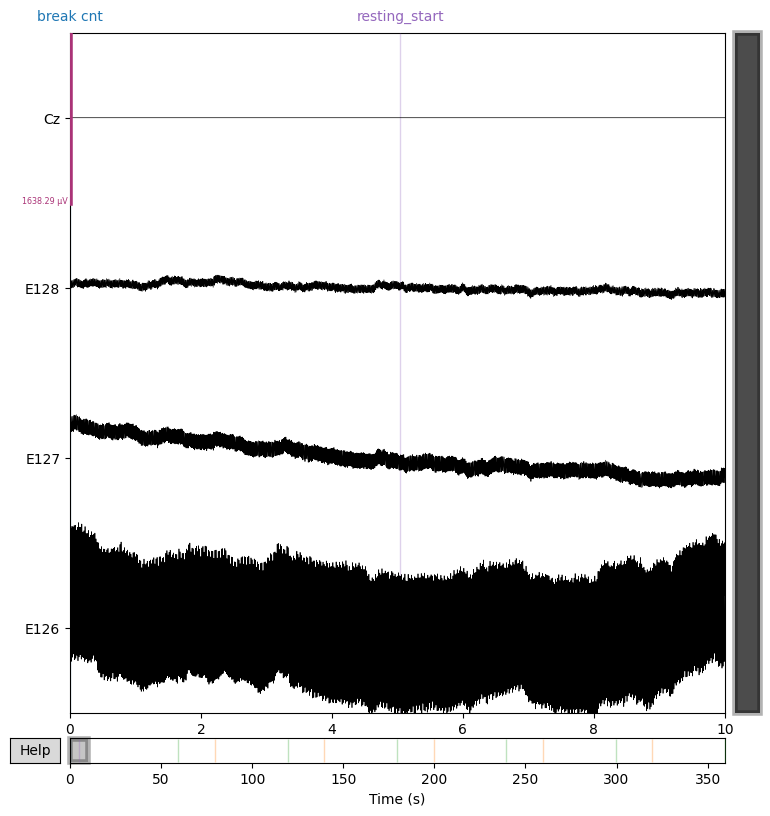

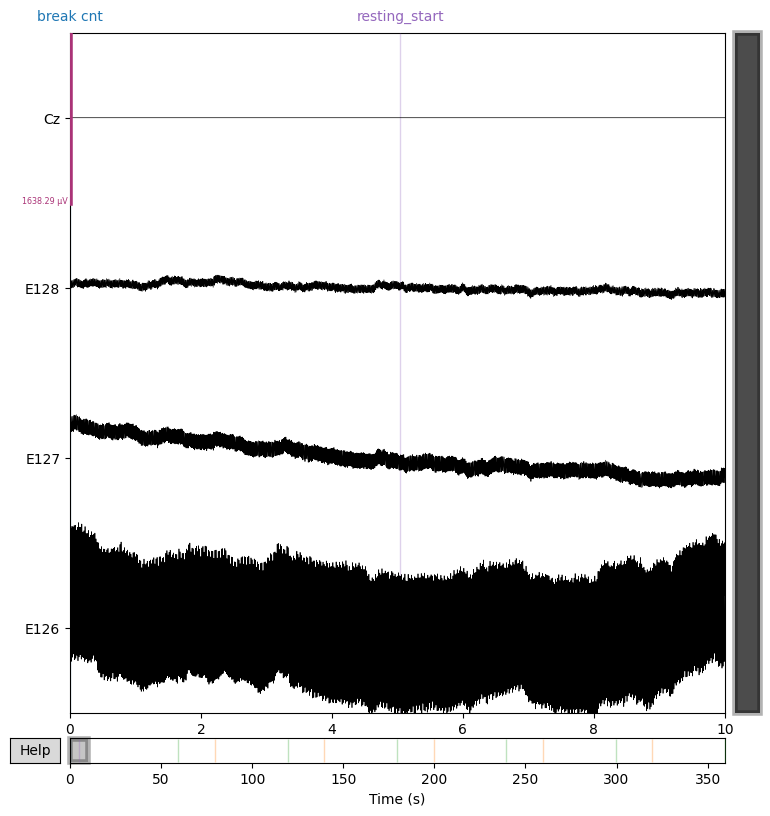

In [4]:
raw.plot(order=[128, 127, 126, 125], show=False, scalings='auto')

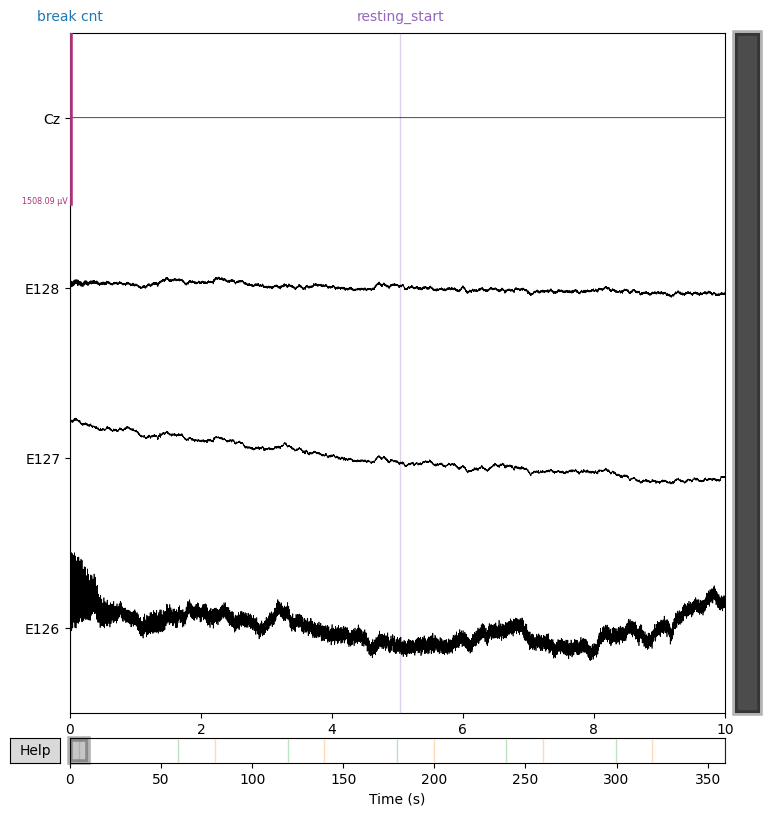

In [ ]:
raw_notch = raw.copy().notch_filter(freqs=[60,120])
raw_notch.plot(order=[128, 127, 126, 125], show=False, scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 59 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 59.00 Hz
- Upper transition bandwidth: 14.75 Hz (-6 dB cutoff frequency: 66.38 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


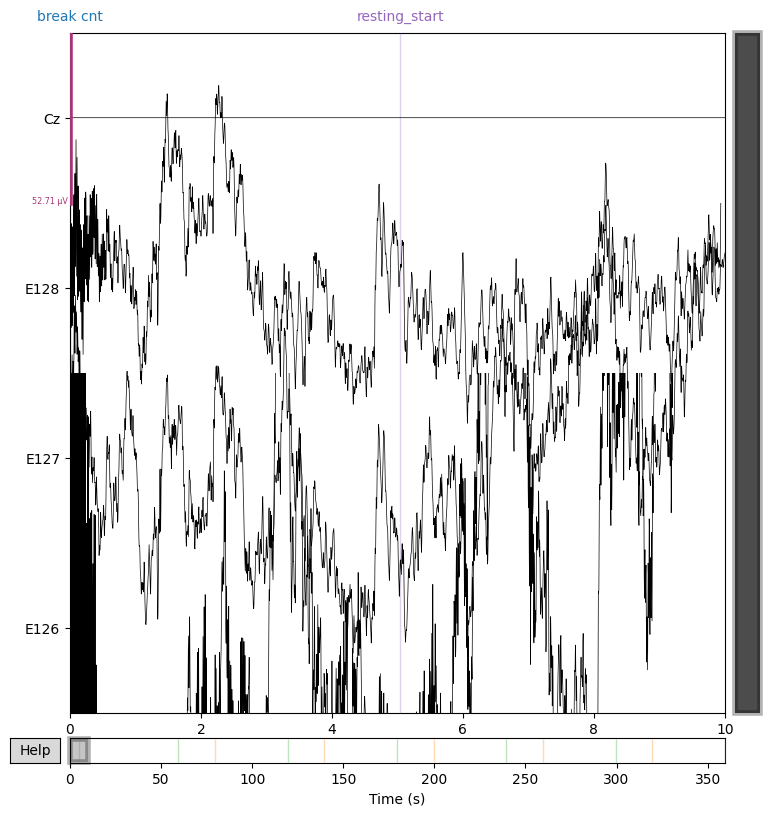

In [7]:
raw_bandpass = raw_notch.copy().filter(l_freq=0.1, h_freq=59)
raw_bandpass.plot(order=[128, 127, 126, 125], show=False, scalings='auto')

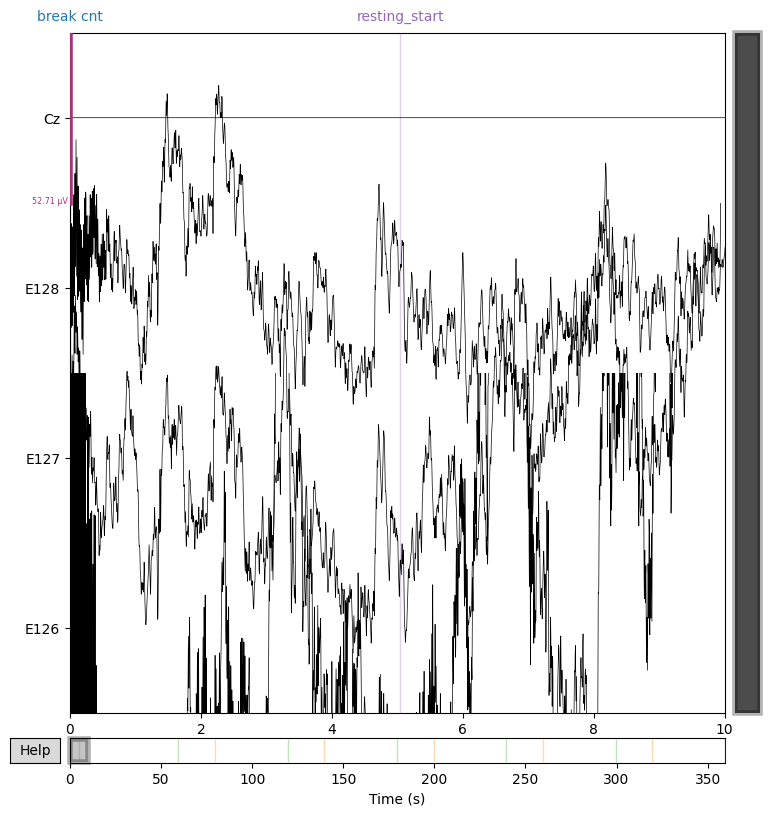

In [8]:
raw_resample = raw_bandpass.copy().resample(sfreq=250)
raw_resample.plot(order=[128, 127, 126, 125], show=False, scalings='auto')

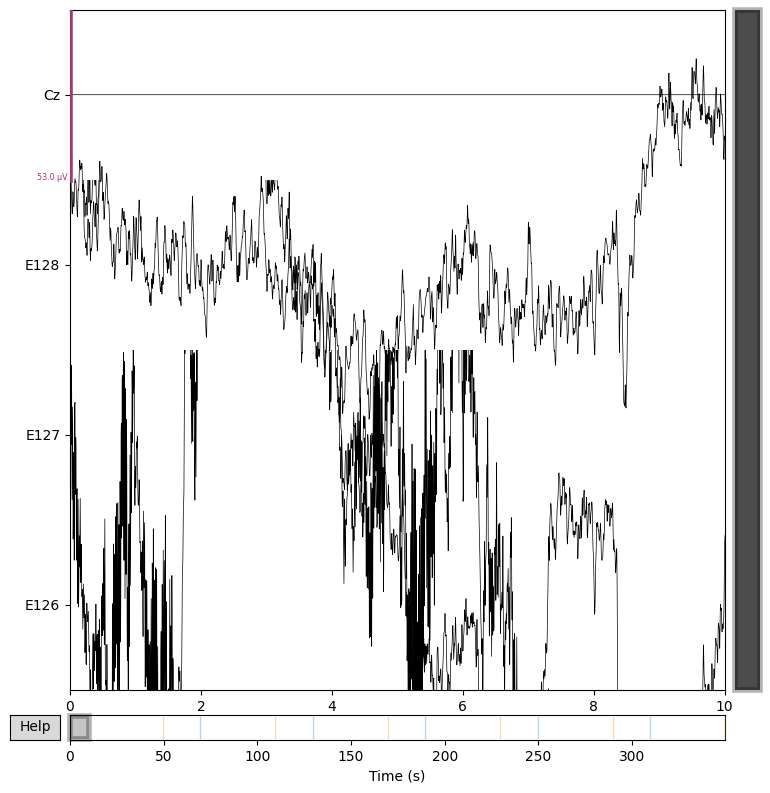

In [9]:
raw_crop = raw_resample.copy().crop(tmin=10)
raw_crop.plot(order=[128, 127, 126, 125], show=False, scalings='auto')

In [31]:
import os
import sys
sys.path.insert(0,'../')
from libs.ssl_data import *
from sklearn.preprocessing import scale as standard_scale
from sklearn.preprocessing import scale
dsnumber = 'ds005515'
# bad_subjects = ['NDARBA381JGH', 'NDARUJ292JXV', 'NDARVN772GLC', 'NDARTD794NKQ', 'NDARBX830ZD4', 'NDARHZ923PAH', 'NDARJP304NK1', 'NDARME789TD2', 'NDARUA442ZVF', 'NDARTY128YLU', 'NDARDW550GU6','NDARLD243KRE']
ds = HBNDataset(dsnumber, data_path=Path('/mnt/nemar/openneuro') / dsnumber, tasks=['RestingState'], num_workers=-1, preload=False, subjects=['NDARXP930ZTG'])
print('Number of datasets', len(ds.datasets))

sampling_rate = 250 # resample to follow the tutorial sampling rate
# Factor to convert from uV to V
factor = 1e6
preprocessors = [
    Preprocessor('notch_filter', freqs=(60, 120)),    
    Preprocessor('filter', l_freq=0.1, h_freq=59),
    Preprocessor('resample', sfreq=sampling_rate),
    Preprocessor('crop', tmin=10),  # crop first 10 seconds as begining of noise recording
    Preprocessor('pick', picks=np.arange(128)),  # discard Cz
    Preprocessor(lambda data: np.multiply(data, factor)),  # Convert from V to uV    
    Preprocessor(scale, channel_wise=True), # normalization for deep learning
]

# Transform the data
preprocess(ds, preprocessors)

BIDS dir path /mnt/nemar/openneuro/ds005515
Reading /mnt/nemar/openneuro/ds005515/sub-NDARXP930ZTG/eeg/sub-NDARXP930ZTG_task-RestingState_eeg.set


Number of datasets 1
Reading 0 ... 179771  =      0.000 ...   359.542 secs...


/home/dung/Documents/braindecode/braindecode/preprocessing/preprocess.py:70: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn("Preprocessing choices with lambda functions cannot be saved.")


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 59 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 59.00 Hz
- Upper transition bandwidth: 14.75 Hz (-6 dB cutoff frequency: 66.38 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.2s
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/dung/eeg-ssl/.venv/lib/python

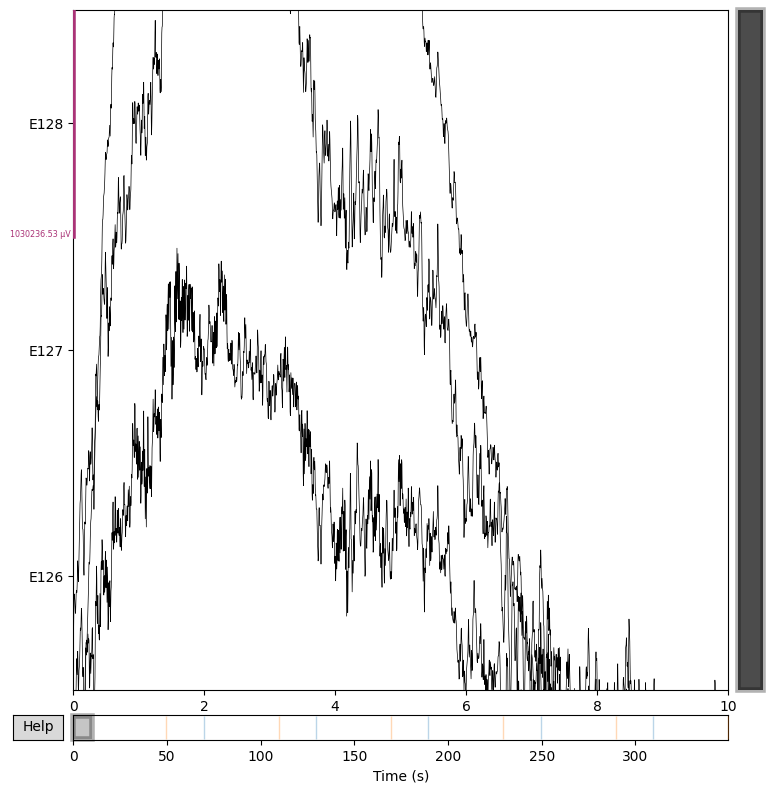

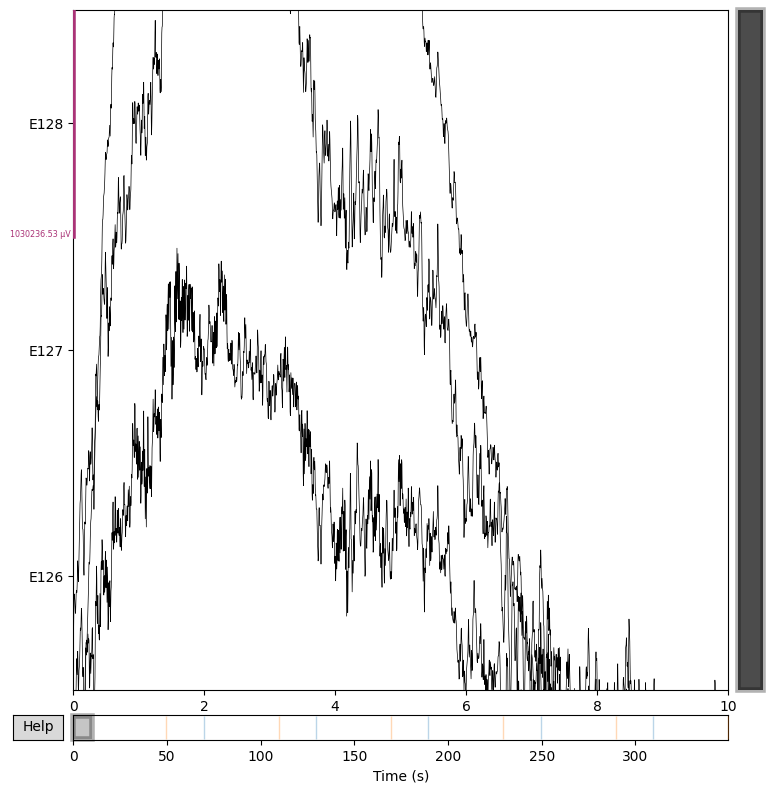

In [32]:
ds.datasets[0].raw.plot(order=[128, 127, 126, 125], scalings='auto')

In [ ]:
ds.datasets[0].raw.get_data()[-1,:] # Cz would have had small amplitude

array([ 3.05081438,  4.28410906,  6.10302447, ..., 21.55529658,
       24.61369662, 10.42269796])

In [34]:
sfreq = ds.datasets[0].raw.info['sfreq']
windows_ds = create_fixed_length_windows(
        ds, 0, None, int(10 * sfreq), int(10 * sfreq), True,
        preload=False, n_jobs=-1)

Window data shape: (128, 2500)


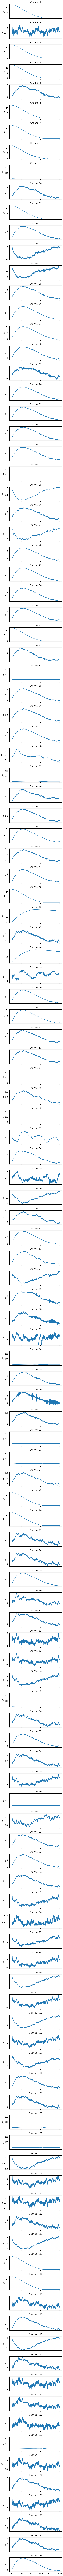

In [35]:
window_data = windows_ds[0][0]
print('Window data shape:', window_data.shape)
# window_data.shape = (129,2500). Plot them all in one figure
fig, axes = plt.subplots(window_data.shape[0], 1, figsize=(5, 200), sharex=True)
for i in range(window_data.shape[0]):
    axes[i].plot(window_data[i,:])
    axes[i].set_title(f'Channel {i+1}')
    axes[i].set_ylabel('uV')
    # axes[i].set_xlabel('Sample')
plt.tight_layout()
plt.show()